<a href="https://colab.research.google.com/github/camen6ert/jupyter/blob/master/pythorch_mnistfashion_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2021-05-01 06:20:50--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2021-05-01 06:20:51 (49.2 MB/s) - ‘helper.py’ saved [2813/2813]



In [1]:
import numpy as np
from torchvision import datasets, transforms
import torch


transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform,
)
trainloader = torch.utils.data.DataLoader(training_data, batch_size=64, shuffle=True)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform,
)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)



Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


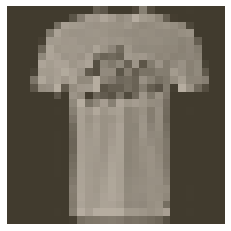

In [2]:
import helper

image, label = next(iter(trainloader))
helper.imshow(image[0,:])


In [37]:
import torch.nn as nn
import torch.nn.functional as F

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.c1 = nn.Conv2d(1, 32, 3)
        self.m1 = nn.MaxPool2d(2,2)
        self.c2 = nn.Conv2d(32,16,3)
        self.do = nn.Dropout(0.25)
        self.l2 = nn.Linear(16*11*11, 10)
        

    def forward(self, x):
        x = self.c1(x)
        x = F.relu(x)
        x = self.m1(x)
        x = F.relu(x)
        x = self.do(x)
        x = self.c2(x)
        x = F.relu(x)
        x = x.view(-1,16*11*11)
        x = self.l2(x)
        return x

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (c1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (m1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1))
  (l2): Linear(in_features=1936, out_features=10, bias=True)
)


In [41]:
import torch.optim as optim

learning_rate = 0.01
batch_size = 64
epochs = 50
train_on_gpu = torch.cuda.is_available()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [42]:
for i in range(epochs):
  train_loss = 0.0

  for data, target in trainloader:
    if train_on_gpu:
      data, target = data.cuda(), target.cuda()

    optimizer.zero_grad()

    output = model(data)

    loss = loss_fn(output, target)
    train_loss += loss.item()

    loss.backward()

    optimizer.step()


  print(train_loss)


430.1832423508167
391.7017280161381
366.92154970765114
349.7071684002876
335.76209070533514
322.99245147407055
312.83416175842285
304.07702450454235
296.50857634842396
289.1204650402069
283.92853205651045
276.835321880877
272.1062652617693
267.6854552105069
263.16501131281257
258.0538433715701
254.05639814585447
250.9768741428852
246.40859815478325
243.27985294908285
240.41217935830355
237.49715573340654
234.05145958065987
230.72212493419647
229.15931188315153
225.97530822828412
223.69465033710003
221.02818445116282
218.98128709942102
217.43176286667585
214.55476580560207
213.2522830925882
210.82720988988876
209.12497260794044
207.28166095167398
205.33205334842205
203.60637364909053
201.59025992825627
199.503876645118
198.63056380674243
196.71925126761198
195.37041728198528
193.81049338169396
192.46180403605103
190.09750650450587
188.77417704090476
187.89815931022167
186.24903592839837
185.19572021067142
183.93061947077513


In [43]:
false_count = 0
true_count = 0

for data, target in trainloader:
  if train_on_gpu:
    data, target = data.cuda(), target.cuda()
  
  output = model(data)

  loss = loss_fn(output, target)
  _, pred = torch.max(output, 1)

  eqs = pred.eq(target.data.view_as(pred))

  for e in eqs:
    if e:
      true_count+=1
    else:
      false_count+=1


acc = true_count * 100 / len(trainloader.dataset.data)
print(acc)

93.18833333333333
